In [1]:
import os, sys, csv, re, importlib, json, ast
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
sys.path.insert(0, "../")
from helpers.parsers import split_path
from helpers.parsers import parse_score
from helpers.parsers import parse_metrics

fontsize = 15

In [40]:
'''
This function queries dataframe with a dictionary with columns' value
'''
def query_df_dict(df, value_dict):
    indices = []
    for key, value in value_dict.items():
        # import pdb; pdb.set_trace();  
        key = key.lower()
        if key in df.columns:
            
            # Core codeline: Filter the df with values in the dict one by one
            df = df.loc[df[key] == value]

    return df.index.tolist()

In [41]:
'''
This function queries dataframe with a single value
'''
def query_df_single(df, value):
    indices = []   

    target = df.columns[0]
    # Core codeline: Filter the df with values in the dict one by one
    # import pdb; pdb.set_trace();
    df = df.loc[df[target] == value]

    return df.index.tolist()

In [42]:
'''
This function removes columns that have same values in all rows.
'''
def remove_column_same_value(df):
    unique_count = df.apply(pd.Series.nunique)
    df = df.drop(unique_count[unique_count == 1].index, axis = 1)
    return df

In [43]:
'''
This function parses score from log.
metric_pattern = ['Metric mse', 'Accuracy Score']

'''

def parse_log_score(model, folder_path, metric_pattern):
    df = pd.read_csv('../results/spreadsheets/{0}_parameter_mapping.csv'.format(model))
    file_names = os.listdir(folder_path)
    count = 1

    # Remove columns that have all same values
    df = remove_column_same_value(df)

    for file_name in file_names:
        if file_name.startswith('log'):
            with open(folder_path + file_name, "r") as f:
                line = f.readline()
                indices = []
                while line:
   
                    if line.startswith('{'):  
                        parameter_dict = ast.literal_eval(line)

                        # query the df with all values in dict
                        indices = query_df_dict(df, parameter_dict)

                    elif line.startswith("['pizero'"):
                        # import pdb; pdb.set_trace();
                        parameter_list = line.rstrip('\n')

                        # query the df with all values in dict
                        indices = query_df_single(df, parameter_list)

                    elif line.startswith(metric_pattern) and indices:
                        score = parse_score(line, pattern = metric_pattern)
                        for index in indices:
                            df.loc[index, str(count)] = score

                    line = f.readline()

            count = count + 1
            # import pdb; pdb.set_trace();       
    df.to_csv("../results/spreadsheets/{0}_{1}.csv".format(model, metric_pattern), index = False)

In [ ]:
model = 'prophet'
folder_path = '../cloudwatch/prophet/'
parse_log_score(model, folder_path, "Metric mse")

In [ ]:
model = 'multi_regression'
folder_path = '../cloudwatch/multi_regression/'
parse_log_score(model, folder_path, "The MSE of prediction is")

In [14]:
model = 'neural_network_123'
folder_path = '../cloudwatch/neural_network_123/'
parse_log_score(model, folder_path, "Accuracy Score")

In [46]:
model = 'neural_network_456'
folder_path = '../cloudwatch/neural_network_456/'
parse_log_score(model, folder_path, "Accuracy Score")

In [17]:
model = 'xgboost_123'
folder_path = '../cloudwatch/xgboost_123/'
parse_log_score(model, folder_path, "Mean Absolute Error")
parse_log_score(model, folder_path, "Accuracy Score")

In [63]:
model = 'xgboost_456'
folder_path = '../cloudwatch/xgboost_456/'
parse_log_score(model, folder_path, "Mean Absolute Error")
parse_log_score(model, folder_path, "Accuracy Score")

In [56]:
model = 'svc_123'
folder_path = '../cloudwatch/svc_123/'
parse_log_score(model, folder_path, "Accuracy Score")

In [57]:
model = 'svc_456'
folder_path = '../cloudwatch/svc_456/'
parse_log_score(model, folder_path, "Accuracy Score")

In [38]:
'''
This function parses metrics from log.
metric_pattern = ['Duration','Billed Duration','Memory Size', 'Max Memory Used']
'''

def parse_log_metric(model, folder_path, metric_pattern):
    df = pd.read_csv('../results/spreadsheets/{0}_parameter_mapping.csv'.format(model))
    file_names = os.listdir(folder_path)
    count = 1

    # Remove columns that have all same values
    df = remove_column_same_value(df)

    for file_name in file_names:
        if file_name.startswith('log'):
            with open(folder_path + file_name, "r") as f:
                line = f.readline()
                indices = []
                while line:
                    if line.startswith('{'):
                        parameter_dict = ast.literal_eval(line)
                        # import pdb; pdb.set_trace();
                        # query the df with all values in dict
                        indices = query_df_dict(df, parameter_dict)

                    elif line.startswith("['pizero"):
                        parameter_list = line.rstrip('\n')

                        # query the df with all values in dict
                        indices = query_df_single(df, parameter_list)

                    elif line.startswith('REPORT') and indices:
                        # import pdb; pdb.set_trace();
                        metrics = parse_metrics(line)
                        for index in indices:
                            df.loc[index, str(count)] = metrics[metric_pattern]

                    line = f.readline()

            count = count + 1
            # import pdb; pdb.set_trace();       
    df.to_csv("../results/spreadsheets/{0}_{1}.csv".format(model, metric_pattern), index = False)

In [20]:
parse_log_metric('multi_regression', '../cloudwatch/multi_regression/', 'Max Memory Used')
parse_log_metric('multi_regression', '../cloudwatch/multi_regression/', 'Billed Duration')

KeyboardInterrupt: 

In [42]:
parse_log_metric('neural_network_123', '../cloudwatch/neural_network_123/', 'Max Memory Used')
parse_log_metric('neural_network_123', '../cloudwatch/neural_network_123/', 'Billed Duration')

In [47]:
parse_log_metric('neural_network_456', '../cloudwatch/neural_network_456/', 'Max Memory Used')
parse_log_metric('neural_network_456', '../cloudwatch/neural_network_456/', 'Billed Duration')

In [48]:
parse_log_metric('svc_123', '../cloudwatch/svc_123/', 'Max Memory Used')
parse_log_metric('svc_123', '../cloudwatch/svc_123/', 'Billed Duration')

In [ ]:
parse_log_metric('svc_456', '../cloudwatch/svc_456/', 'Max Memory Used')
parse_log_metric('svc_456', '../cloudwatch/svc_456/', 'Billed Duration')

In [18]:
parse_log_metric('xgboost_123', '../cloudwatch/xgboost_123/', 'Max Memory Used')
parse_log_metric('xgboost_123', '../cloudwatch/xgboost_123/', 'Billed Duration')

In [64]:
parse_log_metric('xgboost_456', '../cloudwatch/xgboost_456/', 'Max Memory Used')
parse_log_metric('xgboost_456', '../cloudwatch/xgboost_456/', 'Billed Duration')

In [11]:
'''
This function parses execution time from nohup.out.
'''

def parse_log_execution_time(model, file_path):
    count = 1
    with open(file_path, "r") as f:
        line = f.readline()
        execution_times = {}
        while line:
            if line.startswith('===Async Tasks end==='):
                temp = f.readline()
                execution_times[count] = float(temp)
                count = count + 1
            line = f.readline()
            
    with open("../results/spreadsheets/{0}_execution_times.csv".format(model), "w") as f:
        w = csv.DictWriter(f, execution_times.keys())
        w.writeheader()
        w.writerow(execution_times)


In [11]:
parse_log_execution_time('multi_regression', '../cloudwatch/multi_regression/multi_regression.out')

In [45]:
parse_log_execution_time('neural_network_123', '../cloudwatch/neural_network_123/neural_network_123.out')

In [48]:
parse_log_execution_time('neural_network_456', '../cloudwatch/neural_network_456/neural_network_456.out')

In [59]:
parse_log_execution_time('svc_123', '../cloudwatch/svc_123/svc_123.out')
parse_log_execution_time('svc_456', '../cloudwatch/svc_456/svc_456.out')

In [19]:
parse_log_execution_time('xgboost_123', '../cloudwatch/xgboost_123/xgboost_123.out')

In [65]:
parse_log_execution_time('xgboost_456', '../cloudwatch/xgboost_456/xgboost_456.out')

In [60]:
def parse_memory(file_path):
    with open(file_path, 'r') as f:
        memory_size_list = []
        max_memory_used_list = []
        billed_duration_list = []
        line = f.readline()
        while line:
            if line.startswith('REPORT'):
                memory_size = re.search(r'(?<=Memory\sSize:\s)(.*?)(?=\sMB)', line).group(0)
                billed_duration = re.search(r'(?<=Billed\sDuration:\s)(.*?)(?=\sms)', line).group(0)
                max_memory_used = re.search(r'(?<=Max\sMemory\sUsed:\s)(.*?)(?=\sMB)', line).group(0)
                memory_size_list.append(int(memory_size))
                billed_duration_list.append(int(billed_duration))
                max_memory_used_list.append(int(max_memory_used))
            line = f.readline()
        df = pd.DataFrame({'memory_size':memory_size_list, 'billed_duration':billed_duration_list, 
                           'max_memory_used':max_memory_used_list})
        fig = plt.figure(figsize=[15, 10])
        ax = fig.add_subplot(211)

        # ax.scatter(df.index, df['max_memory_used'])
        ax.plot(df['max_memory_used'])
        ax.set_title('Max Memory Used (MB)')
        ax.set_ylabel('Max Memory Used (MB)', fontsize=fontsize)
        # ax.set_xlabel("Allocated Memory (MB)", fontsize=fontsize)
        
        ax = fig.add_subplot(212)
        # ax.scatter(df.index, df['billed_duration'])
        ax.plot(df['billed_duration'])
        ax.set_title('Billed Duration (ms)')
        ax.set_ylabel('Billed Duration (ms)', fontsize=fontsize)
        # ax.set_xlabel("Allocated Memory (MB)", fontsize=fontsize)


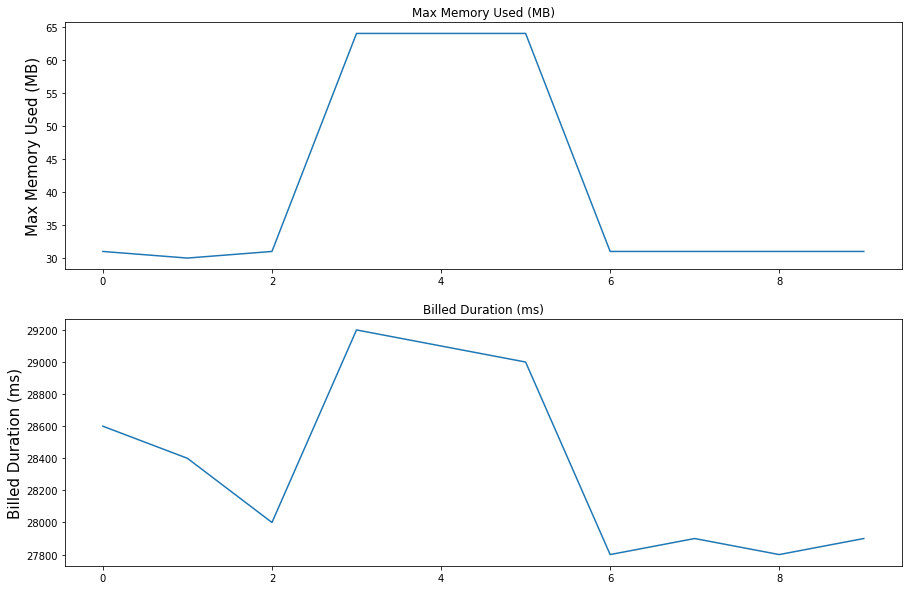

In [61]:
parse_memory('/Users/michaelzhang/Downloads/Seneca/cloudwatch/matrix_multiplication_128.txt')

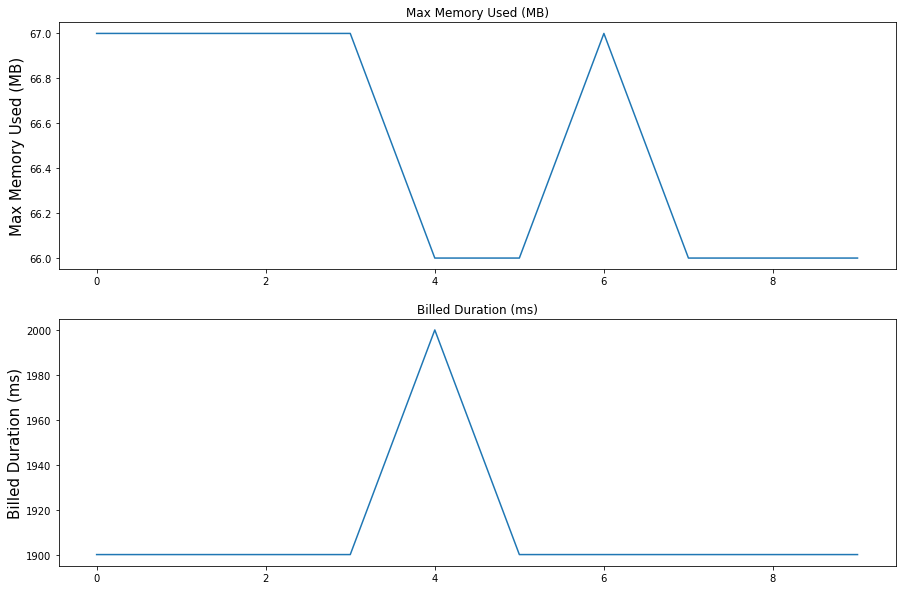

In [62]:
parse_memory('/Users/michaelzhang/Downloads/Seneca/cloudwatch/matrix_multiplication_3008.txt')

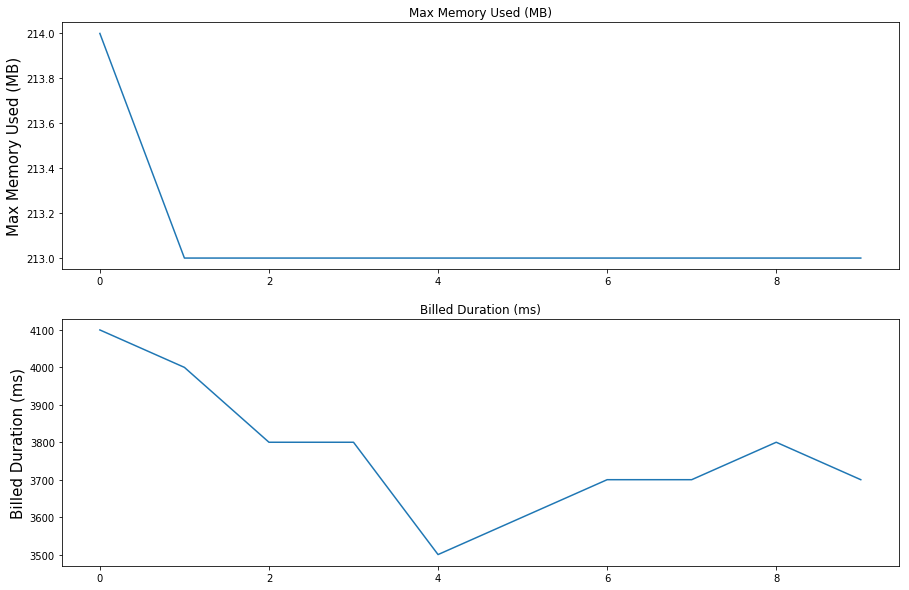

In [63]:
parse_memory('/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_256.txt')

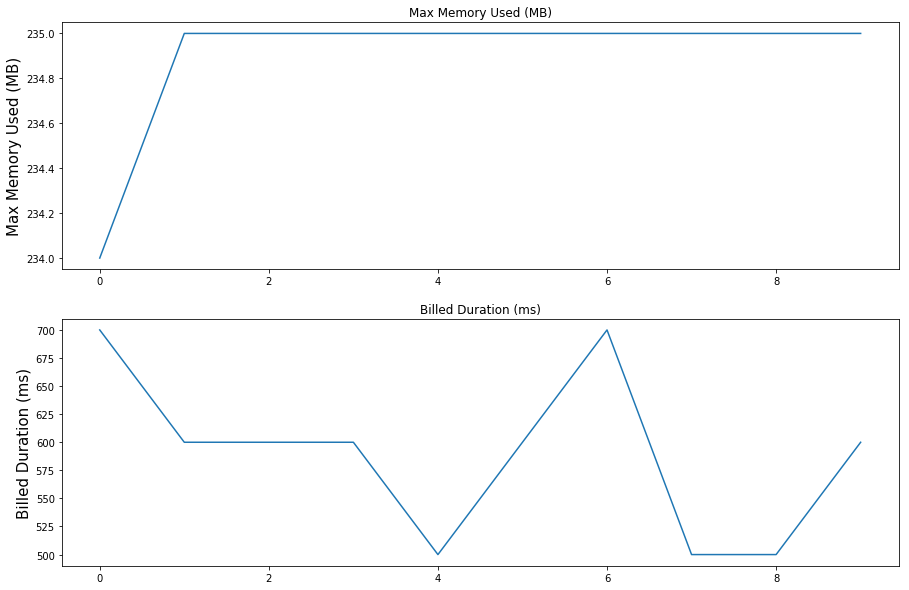

In [64]:
parse_memory('/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_3008.txt')

In [65]:
def parse_memory_step(file_path):
    with open(file_path, 'r') as f:
        memory_size_list = []
        max_memory_used_list = []
        billed_duration_list = []
        line = f.readline()
        while line:
            if line.startswith('REPORT'):
                memory_size = re.search(r'(?<=Memory\sSize:\s)(.*?)(?=\sMB)', line).group(0)
                billed_duration = re.search(r'(?<=Billed\sDuration:\s)(.*?)(?=\sms)', line).group(0)
                max_memory_used = re.search(r'(?<=Max\sMemory\sUsed:\s)(.*?)(?=\sMB)', line).group(0)
                memory_size_list.append(int(memory_size))
                billed_duration_list.append(int(billed_duration))
                max_memory_used_list.append(int(max_memory_used))
            line = f.readline()
        df = pd.DataFrame({'memory_size':memory_size_list, 'billed_duration':billed_duration_list, 
                           'max_memory_used':max_memory_used_list})
        fig = plt.figure(figsize=[15, 15])
        ax = fig.add_subplot(211)
        ax.plot(df['memory_size'], df['max_memory_used'])
        ax.set_title('Max Memory Used (MB)')
        ax.set_ylabel('Max Memory Used (MB)', fontsize=fontsize)
        ax.set_xlabel("Allocated Memory (MB)", fontsize=fontsize)
        ax = fig.add_subplot(212)
        ax.plot(df['memory_size'], df['billed_duration'])
        ax.set_title('Billed Duration (ms)')
        ax.set_ylabel('Billed Duration (ms)', fontsize=fontsize)
        ax.set_xlabel("Allocated Memory (MB)", fontsize=fontsize)


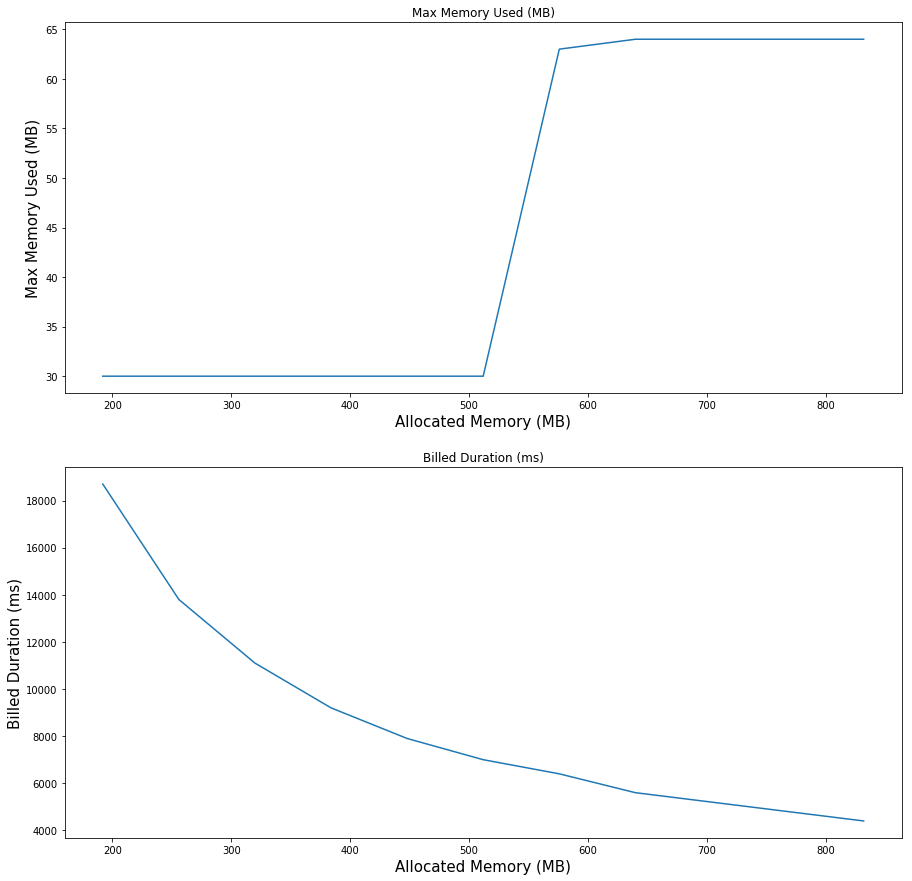

In [66]:
parse_memory_step('/Users/michaelzhang/Downloads/Seneca/cloudwatch/matrix_multiplication_steps.txt')

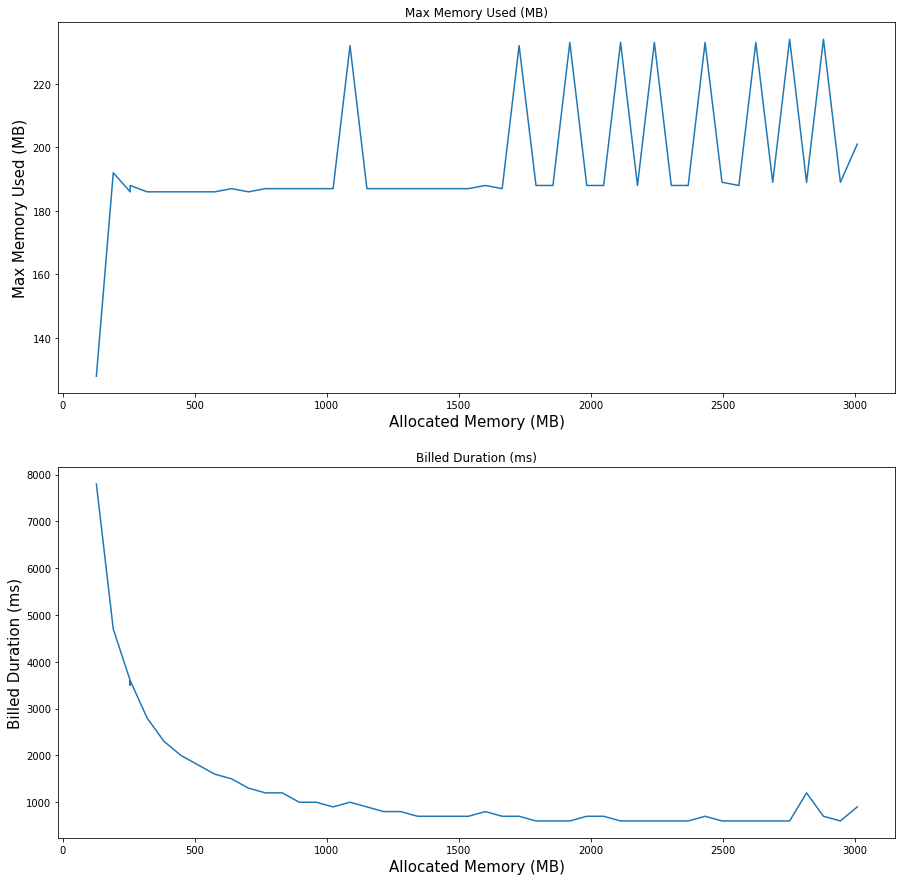

In [23]:
parse_memory_step('/Users/michaelzhang/Downloads/Seneca/cloudwatch/svc_step.txt')

In [30]:
def parse_memory_duration(model, index):
    df_memory = pd.read_csv('/Users/michaelzhang/Downloads/Seneca/results/spreadsheets/{0}_Max Memory Used.csv'.format(model))
    df_duration = pd.read_csv('/Users/michaelzhang/Downloads/Seneca/results/spreadsheets/{0}_Billed Duration.csv'.format(model))
    cols = [str(x) for x in list(range(1, 31))]
    df_memory = df_memory[cols]
    df_duration = df_duration[cols]
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(211)
    ax.set_title('Max Memory Used (MB)')
    ax.set_ylabel('Max Memory Used (MB)', fontsize=fontsize)
    ax.set_xlabel("Trials)", fontsize=fontsize)
    ax.plot(df_memory.loc[index])
    ax = fig.add_subplot(212)
    ax.set_title('Billed Duration (ms)')
    ax.set_ylabel('Billed Duration (ms)', fontsize=fontsize)
    ax.set_xlabel("Trials", fontsize=fontsize)
    ax.plot(df_duration.loc[index])

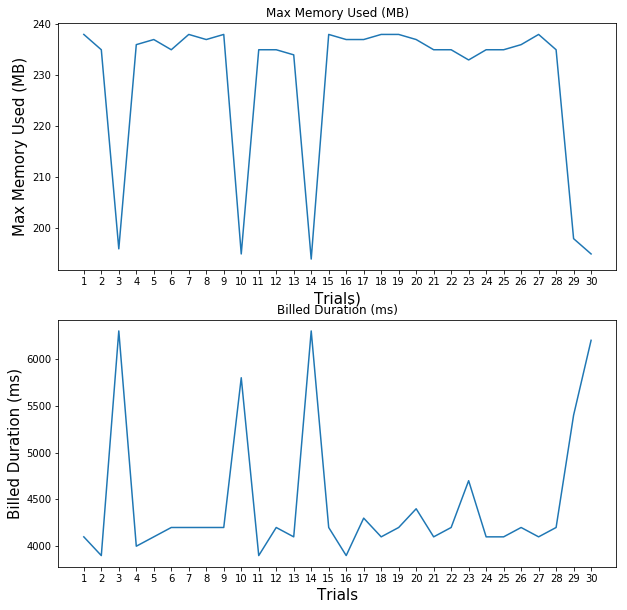

In [36]:
parse_memory_duration('svc_456', 2)

In [35]:
data = {"Name": ["AAAA", "BBBB"],
        "C1": [25, 25],
        "C2": [2, 1],
        "C3": [1, 10]}
df = pd.DataFrame(data)
df

,Name,C1,C2,C3
0,AAAA,25,2,1
1,BBBB,25,1,10
